In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import astropy.constants as const 

In [3]:
sigma_time = 20  # in minutes
sigma_bin = pd.Timedelta(minutes=sigma_time)

In [4]:
parker = pd.read_csv("../../data/results/parker_e23_wo_electron.csv")
parker['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in parker.Time]

In [5]:
flag_mask = parker['flag'] == 0
# parker = parker[np.logical_or(flag_mask, time_mask)].copy()
parker = parker[flag_mask].copy()

In [6]:
parker

,Time,vr,vt,vn,Np,Tp,angle_vb,vra,vta,vna,...,Pa,flag,lon,lat,rAU,sslon,sslat,ssrAU,NpR2,BrR2
13670,2025-03-21 12:00:00.258784,317.88147,-60.987312,29.515880,1020.2543,64.676030,2.293514,406.09094,-86.136340,-19.202179,...,2.437100e-09,0.0,332.417903,2.004344,0.104518,339.872131,2.004344,0.011626,11.145316,-3.615598
13671,2025-03-21 12:00:03.754025,312.99332,-57.723400,14.798349,1074.4746,65.191734,2.155223,426.38293,-65.738235,-11.102455,...,2.541290e-09,0.0,332.418401,2.004282,0.104516,340.014785,2.004282,0.011626,11.737161,-3.797693
13672,2025-03-21 12:00:07.249325,305.13568,-60.964100,-0.752957,1138.5217,63.948055,2.104992,397.04886,-66.293520,-11.378509,...,2.087948e-09,0.0,332.418898,2.004220,0.104514,340.168599,2.004220,0.011626,12.436301,-3.845947
13673,2025-03-21 12:00:10.744566,307.62488,-62.725964,4.354089,1100.6781,64.416740,2.144131,430.67730,-68.915886,-37.039284,...,2.142119e-09,0.0,332.419395,2.004159,0.104512,340.081891,2.004159,0.011626,12.022456,-3.814585
13674,2025-03-21 12:00:14.239807,313.99580,-62.511757,21.324875,1097.9583,63.967365,2.201124,424.46915,-87.984570,3.948366,...,2.569522e-09,0.0,332.419893,2.004097,0.104510,339.956555,2.004097,0.011626,11.992279,-3.767370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100556,2025-03-23 23:59:43.342395,330.96690,-18.550837,-28.340378,1341.0378,44.369312,1.876016,470.81180,-60.883335,-0.223276,...,3.471688e-09,0.0,129.449416,-1.243069,0.087856,135.316064,-1.243069,0.011626,10.351100,-4.398721
100557,2025-03-23 23:59:46.837636,331.39926,-25.139784,-27.670425,1382.1870,45.395588,1.871963,482.59430,-41.720400,-15.487565,...,3.205341e-09,0.0,129.450357,-1.242972,0.087858,135.313452,-1.242972,0.011626,10.669227,-4.354650
100558,2025-03-23 23:59:50.332936,330.57160,-19.572727,-18.175007,1324.4658,43.660740,1.853355,471.38870,-37.750740,-27.147707,...,2.483273e-09,0.0,129.451298,-1.242876,0.087860,135.321786,-1.242876,0.011626,10.224157,-4.405964
100559,2025-03-23 23:59:53.828177,332.79100,-30.674746,-20.074915,1407.9640,45.477370,1.915914,464.82170,-58.764656,-0.268365,...,3.207541e-09,0.0,129.452239,-1.242779,0.087863,135.290733,-1.242779,0.011626,10.869235,-4.384792


In [7]:
# Ensure 'Time' is the index and is a DateTimeIndex before resampling
if not isinstance(parker.index, pd.DatetimeIndex):
    parker = parker.set_index('Time')
pss = parker.resample(sigma_bin, closed='left', label='left').mean()
pss.index = pss.index + sigma_bin / 2   # replaces loffset
pss['Time'] = pss.index

In [8]:
pss.columns

Index(['vr', 'vt', 'vn', 'Np', 'Tp', 'angle_vb', 'vra', 'vta', 'vna', 'Na',
       'Ta', 'Br', 'Bt', 'Bn', 'B', 'vap', 'Ahe', 'polarity', 'sigmac',
       'sigmar', 'vA', 'Zp', 'Zm', 'deltav', 'deltab', 'rA', 'diff', 'MA',
       'beta', 'Pm', 'Pp', 'Pa', 'flag', 'lon', 'lat', 'rAU', 'sslon', 'sslat',
       'ssrAU', 'NpR2', 'BrR2', 'Time'],
      dtype='object')

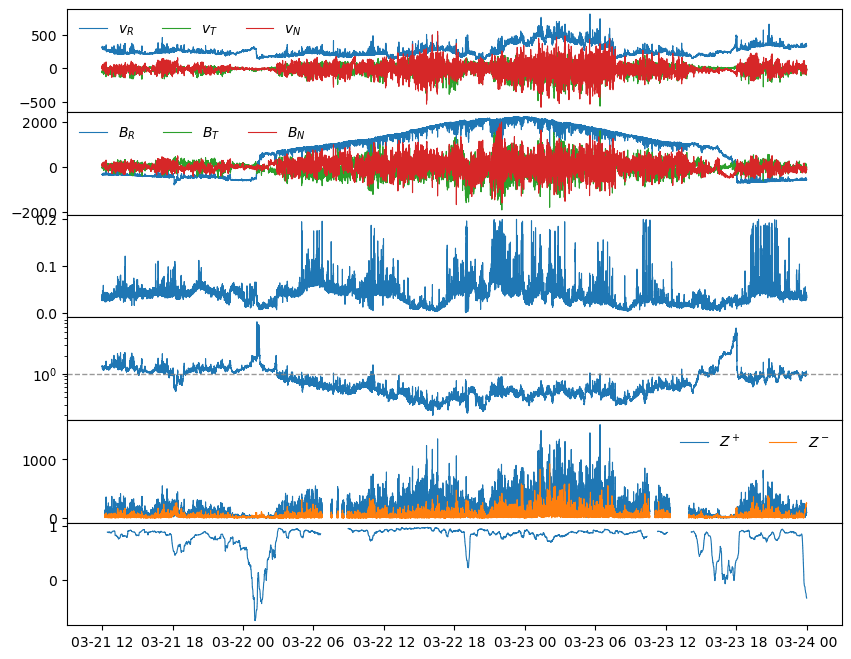

In [9]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(10, 8), sharex=True, 
                                  gridspec_kw={"hspace":0})

ax1.step(parker.index, parker['vr'], color="tab:blue", where="mid", lw=0.8, label=r"$v_R$")
ax1.step(parker.index, parker['vt'], color="tab:green", where="mid", lw=0.8, label=r"$v_T$")
ax1.step(parker.index, parker['vn'], color="tab:red", where="mid", lw=0.8, label=r"$v_N$")

ax1.legend(ncol=3, frameon=False)

ax2.step(parker.index, parker['Br'], color="tab:blue", where="mid", lw=0.8, label=r"$B_R$")
ax2.step(parker.index, parker['Bt'], color="tab:green", where="mid", lw=0.8, label=r"$B_T$")
ax2.step(parker.index, parker['Bn'], color="tab:red", where="mid", lw=0.8, label=r"$B_N$")

ax2.legend(ncol=3, frameon=False)

ax3.step(parker.index, parker['Ahe'], where="mid", lw=0.8,)

ax4.step(parker.index, parker["MA"], where="mid", lw=0.8)
ax4.set_yscale("log")
ax4.axhline(1, color="grey", alpha=0.8, lw=1, ls="--")

ax5.step(parker.index, parker["Zp"], where="mid", color="tab:blue", lw=0.8, label=r"$Z^+$")
ax5.step(parker.index, parker["Zm"], where="mid", color="tab:orange", lw=0.8, label=r"$Z^-$")
ax5.legend(ncol=2, frameon=False)

ax6.step(parker.index, parker["sigmac"], where="mid", lw=0.8)



Text(0, 0.5, '$\\sigma_c$')

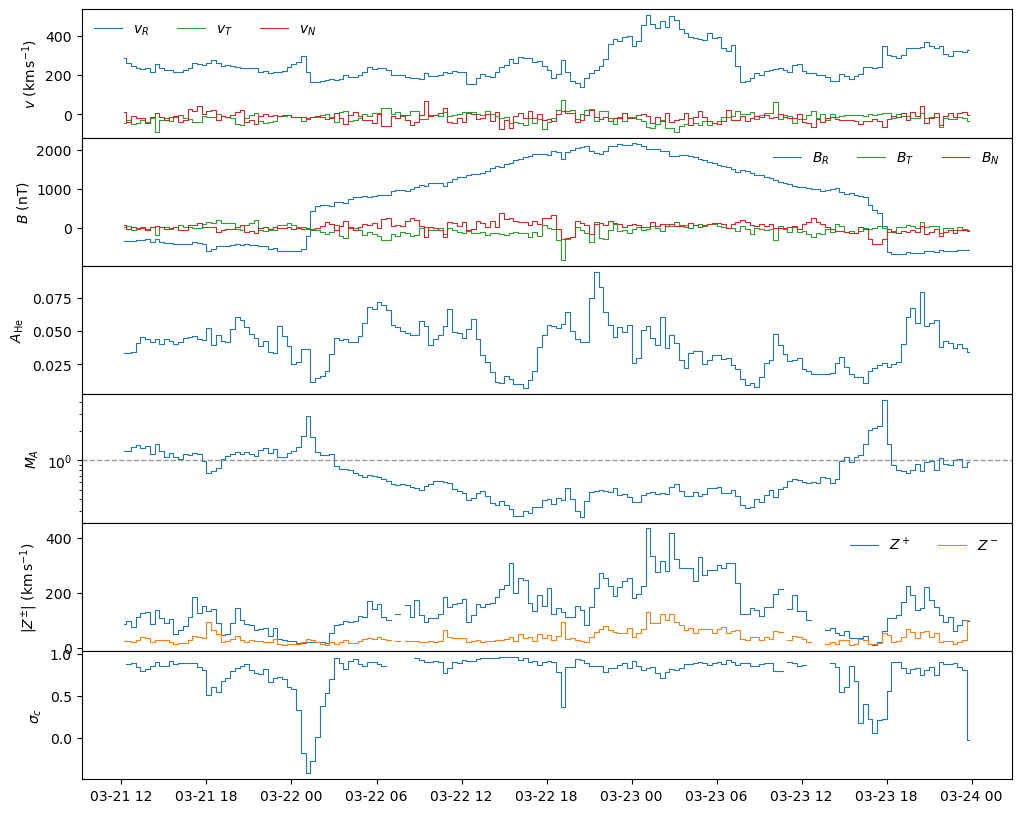

In [10]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(12, 10), sharex=True, 
                                  gridspec_kw={"hspace":0})

ax1.step(pss.index, pss['vr'], color="tab:blue", where="mid", lw=0.8, label=r"$v_R$")
ax1.step(pss.index, pss['vt'], color="tab:green", where="mid", lw=0.8, label=r"$v_T$")
ax1.step(pss.index, pss['vn'], color="tab:red", where="mid", lw=0.8, label=r"$v_N$")

ax1.legend(ncol=3, frameon=False)
ax1.set_ylabel(r"$v$ ($\rm{km\,s^{-1}}$)")

ax2.step(pss.index, pss['Br'], color="tab:blue", where="mid", lw=0.8, label=r"$B_R$")
ax2.step(pss.index, pss['Bt'], color="tab:green", where="mid", lw=0.8, label=r"$B_T$")
ax2.step(pss.index, pss['Bn'], color="tab:red", where="mid", lw=0.8, label=r"$B_N$")

ax2.legend(ncol=3, frameon=False)
ax2.set_ylabel(r"$B$ ($\rm{nT}$)")

ax3.step(pss.index, pss['Ahe'], where="mid", lw=0.8,)
ax3.set_ylabel(r"$A_{\rm He}$")

ax4.step(pss.index, pss["MA"], where="mid", lw=0.8)
ax4.set_yscale("log")
ax4.axhline(1, color="grey", alpha=0.8, lw=1, ls="--")
ax4.set_ylabel(r"$M_A$")

ax5.step(pss.index, pss["Zp"], where="mid", color="tab:blue", lw=0.8, label=r"$Z^+$")
ax5.step(pss.index, pss["Zm"], where="mid", color="tab:orange", lw=0.8, label=r"$Z^-$")
ax5.legend(ncol=2, frameon=False)
ax5.set_ylabel(r"$|Z^{\pm}|\ (\rm{km\,s^{-1}})$")

ax6.step(pss.index, pss["sigmac"], where="mid", lw=0.8)
ax6.set_ylabel(r"$\sigma_c$")


In [15]:
flux_wave = (3/2 + pss['vA']/pss['vap'])*(pss['deltab']*1e-9)**2/(2*const.mu0.value)*pss['vap']*1e3 * 1e3 # in erg cm^-2 s^-1

/tmp/ipykernel_64596/4132660715.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax7.legend(ncol=2, frameon=False)


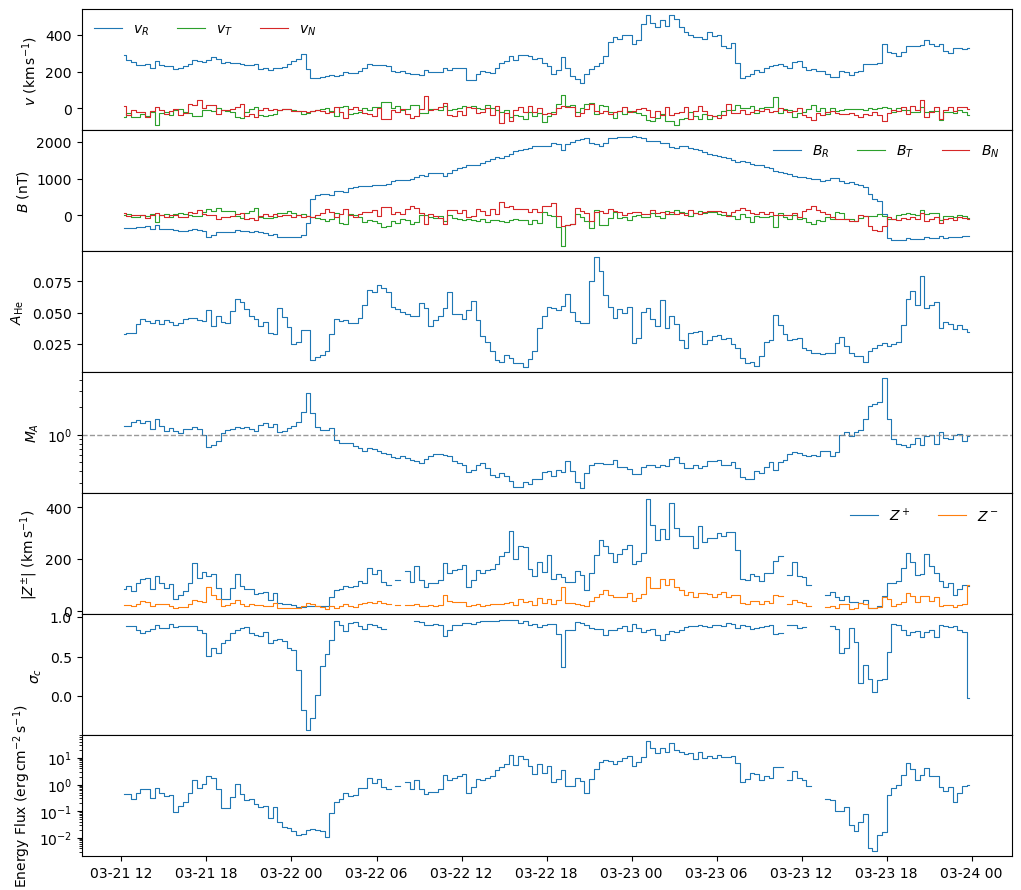

In [17]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(12, 11), sharex=True, 
                                  gridspec_kw={"hspace":0})

ax1.step(pss.index, pss['vr'], color="tab:blue", where="mid", lw=0.8, label=r"$v_R$")
ax1.step(pss.index, pss['vt'], color="tab:green", where="mid", lw=0.8, label=r"$v_T$")
ax1.step(pss.index, pss['vn'], color="tab:red", where="mid", lw=0.8, label=r"$v_N$")

ax1.legend(ncol=3, frameon=False)
ax1.set_ylabel(r"$v$ ($\rm{km\,s^{-1}}$)")

ax2.step(pss.index, pss['Br'], color="tab:blue", where="mid", lw=0.8, label=r"$B_R$")
ax2.step(pss.index, pss['Bt'], color="tab:green", where="mid", lw=0.8, label=r"$B_T$")
ax2.step(pss.index, pss['Bn'], color="tab:red", where="mid", lw=0.8, label=r"$B_N$")

ax2.legend(ncol=3, frameon=False)
ax2.set_ylabel(r"$B$ ($\rm{nT}$)")

ax3.step(pss.index, pss['Ahe'], where="mid", lw=0.8,)
ax3.set_ylabel(r"$A_{\rm He}$")

ax4.step(pss.index, pss["MA"], where="mid", lw=0.8)
ax4.set_yscale("log")
ax4.axhline(1, color="grey", alpha=0.8, lw=1, ls="--")
ax4.set_ylabel(r"$M_A$")

ax5.step(pss.index, pss["Zp"], where="mid", color="tab:blue", lw=0.8, label=r"$Z^+$")
ax5.step(pss.index, pss["Zm"], where="mid", color="tab:orange", lw=0.8, label=r"$Z^-$")
ax5.legend(ncol=2, frameon=False)
ax5.set_ylabel(r"$|Z^{\pm}|\ (\rm{km\,s^{-1}})$")

ax6.step(pss.index, pss["sigmac"], where="mid", lw=0.8)
ax6.set_ylabel(r"$\sigma_c$")

ax7.step(pss.index, flux_wave, where="mid", color="tab:blue", lw=0.8)
ax7.set_yscale("log")
ax7.set_ylabel(r"Energy Flux ($\rm{erg\,cm^{-2}\,s^{-1}}$)")
ax7.legend(ncol=2, frameon=False)